In [1]:
!pip install pandas seaborn matplotlib

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv(r'superstore_final_dataset.csv', encoding='latin1' )


In [7]:
df.shape

(9800, 18)

In [8]:
import numpy as np

In [9]:
df = pd.read_csv(r'superstore_final_dataset.csv', encoding='latin1' )


In [10]:
df.tail(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [12]:
for col in df.columns:
    print('---'*5)
    if df[col].nunique() < 50:
        print(f'Name of {col}:')
        print(df[col].value_counts().nlargest(10))
        print('---'*5)

---------------
---------------
---------------
---------------
---------------
Name of Ship_Mode:
Ship_Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64
---------------
---------------
---------------
---------------
Name of Segment:
Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64
---------------
---------------
Name of Country:
Country
United States    9800
Name: count, dtype: int64
---------------
---------------
---------------
Name of State:
State
California        1946
New York          1097
Texas              973
Pennsylvania       582
Washington         504
Illinois           483
Ohio               454
Florida            373
Michigan           253
North Carolina     247
Name: count, dtype: int64
---------------
---------------
---------------
Name of Region:
Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64
-------

In [13]:
df= df.drop('Country', axis=1)

In [14]:
df.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


## Checking null values

In [15]:
pd.DataFrame(df.isnull().sum()).T

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0


## Checking where the null values are

In [ ]:
df[df.Postal_Code.isnull()][:2]

In [ ]:
df.loc[(df['City'] == 'Burlington') & (df['State'] == 'Vermont'), 'Postal_Code'] = 05402.0

# the reason we are not dropping the data is we have a meaningful insights. and the reason we don't substitute the null with the mean is may postalcode got adjusted wrong.

In [ ]:
df[df.Postal_Code == 05402.0][:2]

In [ ]:
pd.DataFrame(df.isnull().sum()).T

In [16]:
df['Customer_ID'].nunique()

793

In [17]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')


In [18]:
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d/%m/%Y')

In [19]:
df['Order_Status'] = df['Ship_Date'].apply(lambda x: 'Delivered' if pd.notna(x) else 'Pending')

In [20]:
df['Cost'] = df.Sales - 5   


In [21]:
df['Profit'] = df.Sales - df.Cost


In [22]:
Total_profit = pd.pivot_table(data=df, columns='Order_ID', values='Profit', aggfunc='sum').T


In [23]:
Total_profit.sort_values(by='Profit', ascending=False)[:10]

,Profit
Order_ID,
CA-2018-100111,70.0
CA-2018-157987,60.0
US-2017-108504,55.0
CA-2017-165330,55.0
US-2016-126977,50.0
CA-2016-131338,50.0
CA-2017-105732,50.0
CA-2016-104346,45.0
CA-2017-145177,45.0


In [24]:
df['ProfitMargin(%)'] = (df.Profit/df.Sales)*100

df['ProfitMargin(%)'].mean()

np.float64(25.434575725569598)

In [25]:
Total_profit = pd.pivot_table(data=df, columns='Order_ID', values='ProfitMargin(%)', aggfunc='mean').T


In [26]:

Total_profit = Total_profit.sort_values(by='ProfitMargin(%)', ascending=False)[:5]



In [28]:
total_profit = pd.pivot_table(data=df, columns=['Order_ID', 'Category', 'Sales'], values='Profit', aggfunc='sum').T


In [29]:
total_profit.sort_values(by='Profit', ascending=False)[:5]

,,,Profit
Order_ID,Category,Sales,
CA-2015-102988,Office Supplies,22.960,10.0
US-2015-150119,Furniture,281.372,10.0
US-2018-169551,Technology,683.988,5.0
CA-2015-100006,Technology,377.970,5.0
CA-2015-100090,Furniture,502.488,5.0


# Customer Retention Analysis

In [30]:
df['OrderMonth'] = df['Order_Date'].dt.to_period('M')

In [31]:
df['CohortMonth'] = df.groupby('Customer_ID')['OrderMonth'].transform('min')

In [32]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [33]:
order_year, order_month = get_date_int(df, 'Order_Date')

In [34]:
cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

In [35]:
df['CohortIndex'] = (order_year - cohort_year) * 12 + (order_month - cohort_month) + 1

In [36]:
grouped = df.groupby(['CohortMonth', 'CohortIndex']).agg({
    'Customer_ID': pd.Series.nunique
}).reset_index()

In [37]:
cohort_counts = grouped.pivot_table(index='CohortMonth', columns='CohortIndex', values='Customer_ID')

In [41]:
customer_retention = cohort_counts.divide(cohort_counts.iloc[:, 0], axis=0)


<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

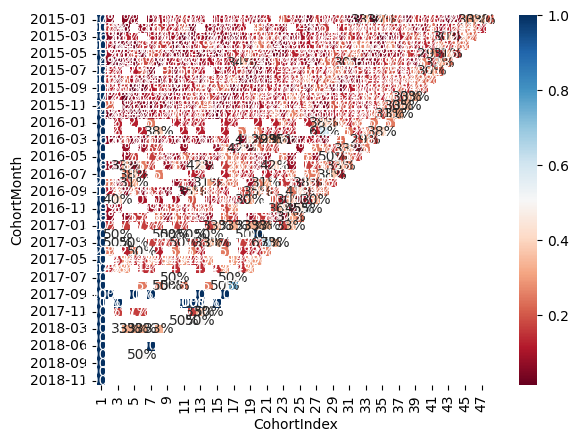

In [44]:
sns.heatmap(customer_retention, annot=True, fmt='.0%', cmap='RdBu')

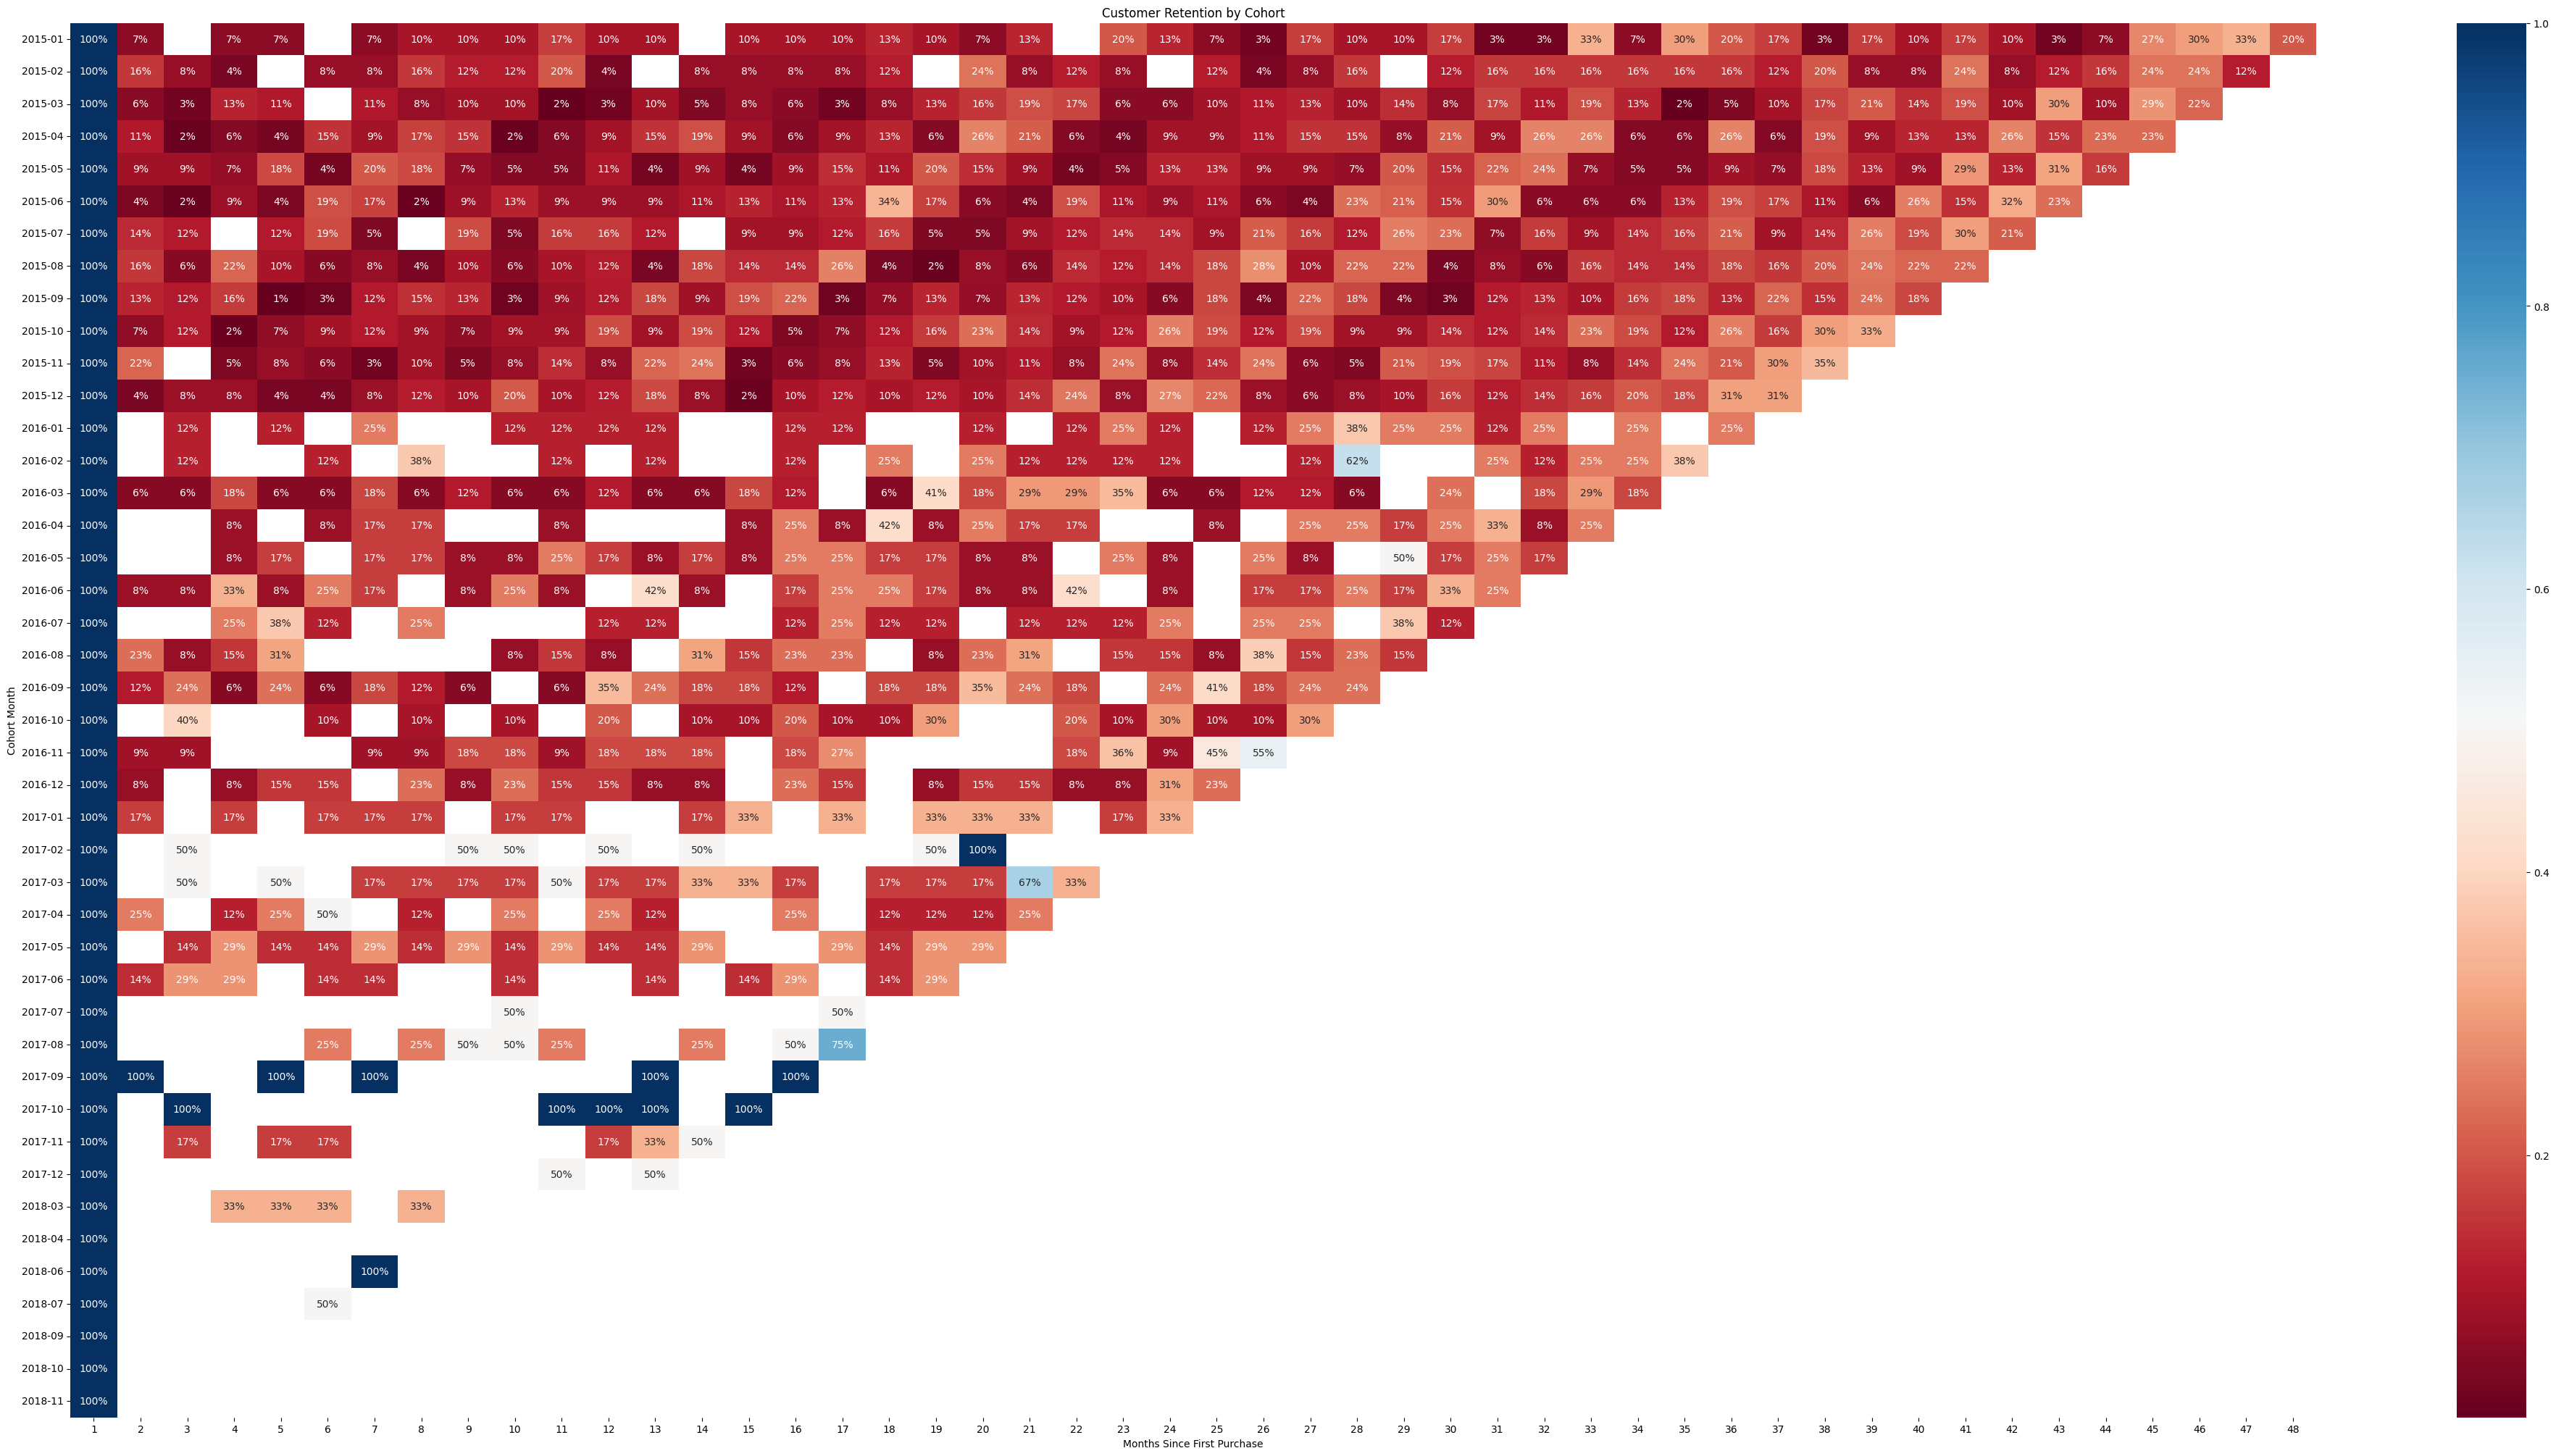

In [45]:
plt.figure(figsize=(50, 25))
sns.heatmap(customer_retention, annot=True, fmt='.0%', cmap='RdBu')
plt.title('Customer Retention by Cohort')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.show()

In [40]:
customer_retention = cohort_counts.divide(cohort_counts.iloc[:, 0], axis=0)